<a href="https://colab.research.google.com/github/zeroaioficial/data_marketing/blob/main/Identificando_fraudes_no_cart%C3%A3o_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="10%" src="https://zeroai.com.br/wp-content/uploads/2021/09/cropped-cropped-logo_zero_preto.png">

##### **Discover | Projetos**
*by [Hyan Dias](https://www.linkedin.com/in/hyan-dias/)*


# **IDENTIFICANDO FRAUDES NO CARTÃO DE CRÉDITO**
### MACHINE LEARNING
____

<img alt="Analisando Airbnb" width="50%" src="https://zeroai.com.br/wp-content/uploads/2022/01/banner.jpg">

A um surgimento exponencial de novos métodos de pagamentos, que vem movimentando o mercado financeiro (pix, carteira digital e Qr code), mas apesar dessas mudanças, o cartão de crédito ainda continua sendo um dos preferidos dos brasileiro, movimentando em 2021 50 Bilhões de transações, segundo a BC.

Esse cenário faz com que sejam atraídos bandidos e quadrilhas que usam o sistema para fraudar. Roubam os dados de clientes, se passando pelo mesmo e assim fazendo transações ilegais. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

É uma dor de cabeça para os clientes e bancos, assim começa a corrida em busca de métodos para detectar essas transações e impedir assim que aconteça.

#### **MACHINE LEARNING: DETECTANDO PADRÕES**

Nesse artigo, vamos utilizar um algoritmo baseado em machine learning (máquina de aprendizado) para detectar as fraudes. 

“Machine Learning é uma tecnologia onde os computadores têm a capacidade de aprender de acordo com as respostas esperadas por meio associações de diferentes dados, os quais podem ser imagens, números e tudo que essa tecnologia possa identificar.”


Ela funciona de muitas maneiras diferentes, mas segue um conceito base. 


- **Condição**: separar os dados que serão treinados e o que serão de testados, tratá-los e padronizá-los.
- **Seleção de algoritmo**: selecionar o modelo de treino na qual a máquina irá aprender.
- **Treinamento**: utilizando os dados de treinamento e o modelo selecionado, iremos detectar um padrão.
- **Teste**: Com o modelo treinado, irá colocá-lo em um ambiente de teste, e verá se alcançará a eficiência preditiva.

.

<img alt="Analisando Airbnb" width="50%" src="https://zeroai.com.br/wp-content/uploads/2022/01/machine.jpg">




#### **OBTENÇÃO DE DADOS**

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas europeias de cartão de crédito. O [dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud) representa as operações financeiras que aconteceram no período de três dias, onde foram classificadas 492 fraudes em meio a quase 280 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Ele contém apenas variáveis ​​de entrada numéricas que são o resultado de uma transformação [PCA (Principal Component Analysis)](https://builtin.com/data-science/step-step-explanation-principal-component-analysis). Infelizmente, devido a questões de confidencialidade, a instituição que fornece os dados não pode fornecer os recursos originais e mais informações básicas sobre os dados. 

As variáveis `V1`, `V2`, … `V28` são os principais componentes obtidos com PCA, as únicas características que não foram transformadas com PCA são 'Time' and 'Amount'. 

- O recurso `Time` contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados.
- O recurso `Amount` é o valor da transação. 
- O recurso `Class` é a variável de resposta e assume valor 1 em caso de fraude e 0 caso contrário.

**Atenção**: O portal está em constante mudança, e existe a possibilidade do conjunto de dados utilizados ser atualizado ou removido, não estando mais disponível, o que poderá trazer erros no código.

E para resolver isso, disponibilizei o arquivo [Credicard](https://www.dropbox.com/s/ztwen3072mzwgvf/creditcard.csv?dl=0), diretamente do meu Dropbox, para que possa replicar esse processo em outros momentos. Vamos importar todos os pacotes e módulos que iremos utilizar.

In [ ]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

!pip install -q scikit-plot
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, auc, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report


A principal biblioteca que vamos importar para construir nossa machine learning é o [scikit-lear](https://scikit-learn.org/stable/), com ela já estão diversos métodos, algoritmos e técnicas bem interessantes que simplificam a vida.

Vamos importar os arquivos **credcard.csv** para os dataframe df.

In [ ]:
# importar os dados para um dataframe
df = pd.read_csv("https://www.dropbox.com/s/ztwen3072mzwgvf/creditcard.csv?dl=1")

Uma dica para quem usar o Dropbox, quando você gera um link para compartilhar o seu Dataset (csv), note que no final do link vai haver o código **dl=0**, altere ele para **dl=1**, assim você irá informar ao Dropbox que queremos o arquivo Excel e não o HTML.

#### **DESCOBRINDO E EXPLORANDO**

Já citamos anteriormente quais variáveis iremos encontrar, que decorrente a transformação feita usando PCA, iremos ter colunas `V1`, `V2`, … `V28`, que são variáveis transformadas e o `Amount`, `Time` e `Class` que permanecerão inalteradas.

Vamos investigar os dados do dataframe e analisar as 5 primeiras entradas com o comando.

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### **ENTRADAS E ATRIBUTOS**

O próprio site detentor do dataset, já nos diz que há aproximadamente 280 mil transações  e que as fraudes correspondem a  0,17%. E para ter certeza faremos o seguinte.

In [ ]:
print(f'Entradas: {df.shape[0]}\nVariáveis: {df.shape[1]}\n')

Entradas: 284807
Variáveis: 31



Podemos notar que possuímos 284.807 entradas, ou transações. E temos no total 31 variáveis/colunas.

Os atributos dos dados ou tipos primitivos, são os formatos dos dados na qual a linguagem (python) irá interpretar. E para examinarmos os atributos das nossas variáveis bastas digitar.

In [ ]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Todos os tipos são float, ou seja números reais, com exceção da variável `Class` que é um número inteiro. Vamos aproveitar e identificar se há valores ausentes.

In [ ]:
df.isnull().sum() / df.shape[0]

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

Como é possível perceber, não temos nenhum valor ausente. Não podemos esquecer de observar a distribuição das nossas variáveis e se há outliers. Para isso.

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


As variáveis que foram transformadas pelo PCA, não tiveram um grande desvio padrão, ou seja, variância entre os pontos.

Já a variável `Amount`, possui um desvio padrão de 250, isso se dá por haver alguns pontos discrepantes, tendo um ponto máximo de 25 mil e a média e mediana ser respectivamente 88,00 e 22,00, uma diferença bem grande.

E para entender melhor essa distribuição, vamos ver quantas transações são fraudes e quantas são legítimas. Sé lembrando que:

- **0** - Transação  normal
- **1** - Fraude


N° Fraude: 492 (0.173%)
N° Normal: 284315 (99.827%)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

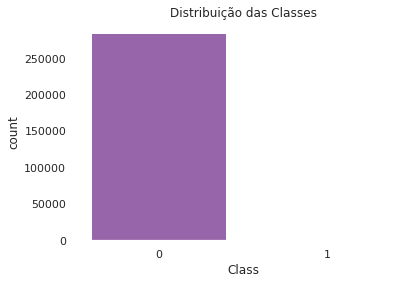

In [ ]:
print(f'N° Fraude: {df[df.Class == 1].value_counts().sum()} ({(df[df.Class == 1].shape[0] / df.shape[0]) * 100:.3f}%)')
print(f'N° Normal: {df[df.Class == 0].value_counts().sum()} ({(df[df.Class == 0].shape[0] / df.shape[0]) * 100:.3f}%)\n')

fig, ax = plt.subplots()
sns.countplot('Class', data=df, color='#9b59b6')
sns.despine(left=True)
ax.set_title('Distribuição das Classes')
ax.set_facecolor('White')

plt.plot()

Há uma diferença muito grande em quantidade de transações normais para fraudes, isso vai impactar quando estivermos desenvolvendo nosso modelo de machine learning, teremos que mais tarde balancear essa proporção.

Outro ponto a observar é a distribuição da quantidade de transações por tempo e comparar se há um padrão entre o normal e as fraudes.

Text(0, 0.5, 'Transações')

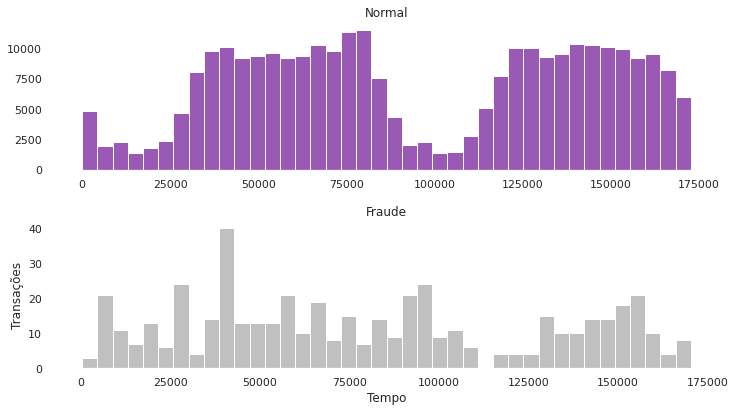

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)

num_bins = 40

ax[0].hist(df.Time[df.Class == 0], bins=num_bins, color = "#9b59b6")
ax[0].set_title('Normal')
ax[0].set_facecolor('White')

ax[1].hist(df.Time[df.Class == 1], bins=num_bins, color = "silver")
ax[1].set_title('Fraude')
ax[1].set_facecolor('White')

plt.xlabel('Tempo')
plt.ylabel('Transações')


Ambas as duas possuem um padrão sazonal, daria até em um tópico futuro fazer uma análise de séries temporais, mas para o momento isso basta. 

Vamos ver também a distribuição do Amount, nesse caso vamos utilizar o boxblot. 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


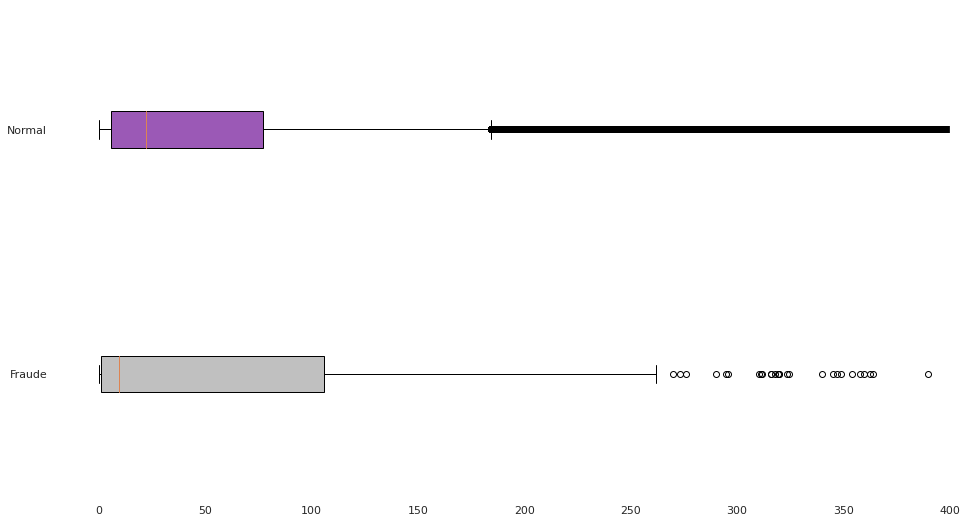

In [ ]:
ax, fig = plt.subplots(figsize=(16,9))
c = "red"

box = plt.boxplot([df.Amount[df.Class == 1], df.Amount[df.Class == 0]], labels=['Fraude', 'Normal'], vert=False, patch_artist=True)
plt.xlim((-20, 400))
fig.set_facecolor('White')

colors = ['silver', '#9b59b6']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

As transações normais possuem muito mais pontos discrepantes, e outro fato é que possui uma mediana maior que as transações fraudulentas. Ou seja, os bandidos tentam atacar usando valores baixos para não serem pegos.

Já que analisamos as variáveis mais importantes, vamos dar uma olhada naquelas que houve a transformação PCA e ver se há uma semelhança na distribuição entre fraude e normal, usando uma função de densidade de probabilidade contínua (kdeplot).

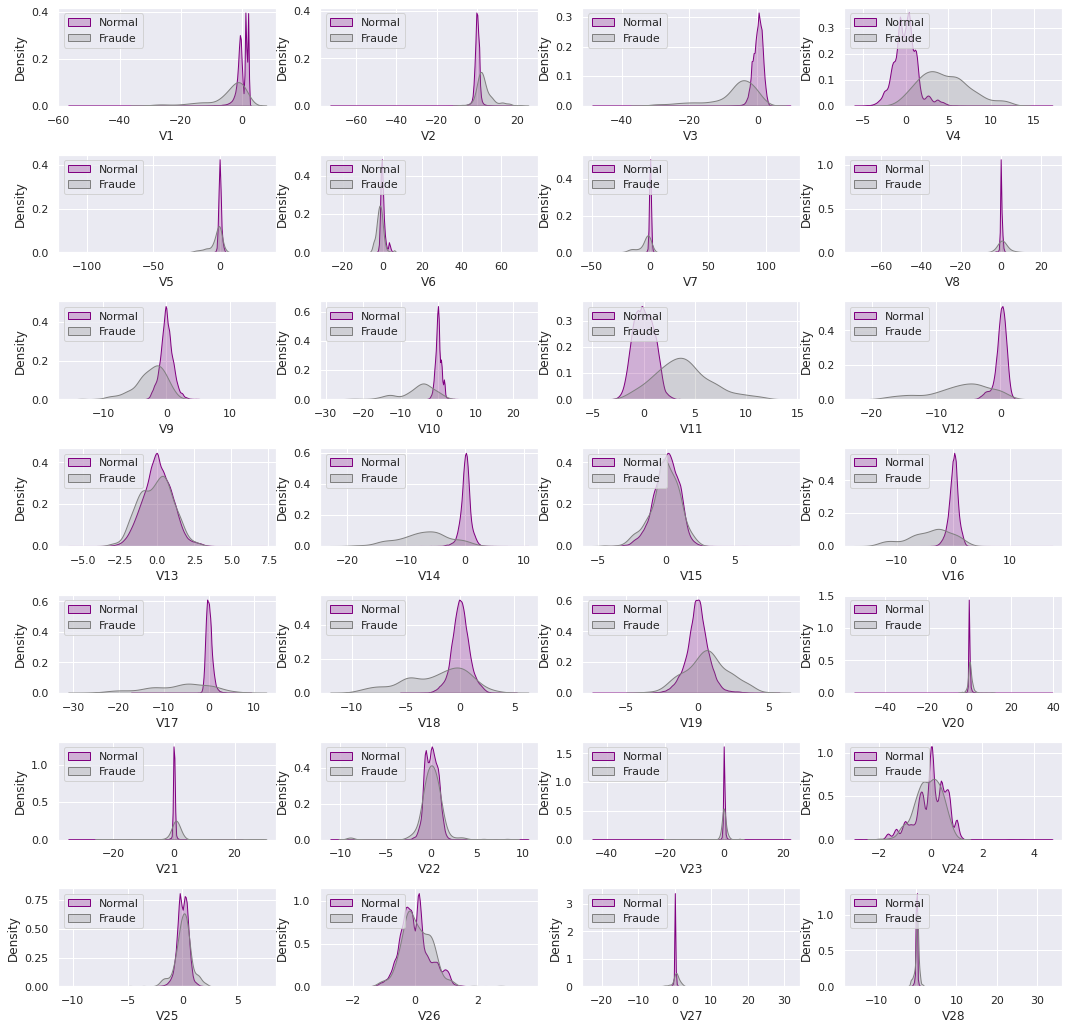

In [ ]:
dx = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
class_0 = df[df.Class == 0]
class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
i = 0

for n in dx:
  i += 1
  plt.subplot(7, 4, i)
  sns.kdeplot(class_0[n], label='Normal', shade=True, color='purple')
  sns.kdeplot(class_1[n], label='Fraude', shade=True, color='gray')
  plt.legend(loc='upper left')

As variáveis `V13`, `V15`, `V22`, `V24`, `V25`, `V26` e `V28`, são muito semelhantes, isso pode ser um prelúdio, que serão variáveis que não terão um grau de importância para a detecção de fraudes, sendo elas difícil de distinguir ou separar o que é fraude do que não é. Mas claro, isso é só uma hipótese, temos que ver na prática.

#### **PADRONIZAÇÃO DOS DADOS**

Enfim chegamos em um momento crítico e importante, padronizar os dados é um etapa importantíssima que consiste na transformação dos dados, é uma prática para evitar que seu algoritmo fique enviesado para as variáveis com maior ordem de grandeza.

É um método que tem o objetivo de transformar todas as variáveis na mesma ordem de grandeza, resultando em uma média igual a 0 e um desvio padrão igual a 1. Usaremos o código **StandardScaler()**

Matematicamente falando o código **StandardScaler()** usa a fórmula z-score para fazer a padronização dos dados.

Vamos fazer uma cópia do dataframa, padronizar as colunas Amount e times, por fim vamos mostrar os dados transformados

In [ ]:
df_clean = df.copy()

# Padronizar as colunas Time e Amount
scaler = StandardScaler()
df_clean['Amount'] = scaler.fit_transform(df_clean['Amount'].values.reshape(-1,1))
df_clean['Time'] = scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

#remover as colunas
df_clean.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


#### **TREINO E TESTE**

É uma convenção separar uma quantidade de dados do dataframe para treinar o modelo de machine learning e com outra parte usar para testá-la, ou seja ver se irá atingir um bom desempenho na verificação de fraudes

Os dados de treino representam cerca de 70% da totalidade dos dados, enquanto os dados de teste representam 30%.

Para fazermos isso vamos separar o dataframe em dois:
x - corresponde a todas a variáveis (`Amount`, `time`, `V1` à `V28`)
y - corresponde a resposta (`Class`).

Logo em seguida vamos usar a função **train_test_split** que irá separar dados que serão variáveis independentes de treino e teste (X_train, X_test), e variáveis dependente  de treinos (y_train, y_test).


In [ ]:
#separa a coluna Class (resposta) do dataset
X = df_clean.drop('Class', axis=1)
y = df_clean.Class

#separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### **REGRESSÃO LOGÍSTICA**

Escolher o modelo de machine learning é uma ciência, na qual é possível haver vários resultados diferentes dependendo do modelo escolhido. Para meios de simplificação do nosso estudo vamos utilizar a regressão logística, por entender que o problema proposto é uma solução binária 0 ou 1, caso esse característico da regressão logística, mas abro aspas “ árvore de decisão e kmeans são modelos que poderiam ser utilizados no estudo e podem ser até mais eficientes que a regressão logística".

A Regressão Logística é um algoritmo de Aprendizado de Máquina utilizado para a classificação de problemas, é um algoritmo de análise preditiva e baseado no conceito de probabilidade.

Alguns dos exemplos de problemas de classificação são spam de e-mail ou não spam, transações online fraude ou não fraude, tumor maligno ou benigno. A regressão logística transforma sua saída usando a função sigmóide logística para retornar um valor de probabilidade.

Usaremos a função **LogisticRegression()** para treinar o modelo


In [ ]:
#modelo de regressão logistica
model = LogisticRegression()
model.fit(X_train, y_train)
importance = model.coef_[0]

Precisamos agora, tentar prever os valores para os dados não treinados (X_teste), testar o nosso modelo, e é quando a função predict() entra em cena.

In [ ]:
# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)

#### **MATRIZ DE CONFUSÃO**

Uma das principais maneiras de verificar o desempenho do algoritmo é por meio da Matriz de Confusão. Para cada classe, ela informa quais os valores reais (True label) e os valores previstos pelo modelo (predicted label).

- **Verdadeiro positivo (TP)**: Por exemplo, quando a transação é normal e o modelo classifica como normal.
- **Falso positivo (FP)**: Por exemplo, quando a transação é normal, mas o modelo classifica como fraude.
- **Falso negativo (FN)**: Por exemplo, quando a transação é fraudulenta e o modelo classifica como normal.
- **Verdadeiro negativo (TN)**: Por exemplo, quando a transação é fraudulenta e o modelo classifica como fraude.

Esse é o modelo da matriz de confusão, ele deixa claro o percentual de cada análise e erros. Assim conseguimos identificar qual o percentual de acerto que o nosso modelo teve na hora de detectar as fraudes, essa métrica é mais relevante, mas claro, não é só isso, precisamos analisar outras métricas para tirar uma conclusão mais precisa.

*Acurácia* | Definitivamente, é a métrica mais intuitiva e fácil para se entender. A acurácia mostra diretamente a porcentagem de acertos do nosso modelo. Apesar de ser muito direta e intuitiva, a acurácia não é uma boa métrica quando você lida, por exemplo, com dados desbalanceados.

*Precision* | A precisão diz respeito à quantidade (proporcional) de identificações positivas feita corretamente, e é obtida pela equação.

*Recall* | Mostra a proporção de positivos encontrados corretamente. 

*F1-score* | É a média harmônica entre precisão e recall. O melhor valor possível para 0 F1-score é 1 e o pior é 0.

*ROC_AUC* | É a área sob a curva característica de Operação do Receptor. Resumindo é uma curva de probabilidade que representa o grau ou medida de separabilidade, ou seja, quanto maior o AUC, melhor é o desempenho do modelo em distinguir fraudes e não fraudes.

Para gerar o relatório  de classificação juntamente com a matriz de confusão, faremos o seguinte código.



Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     71083
           1     0.8172    0.6387    0.7170       119

    accuracy                         0.9992     71202
   macro avg     0.9083    0.8192    0.8583     71202
weighted avg     0.9991    0.9992    0.9991     71202

AUC: 0.8192



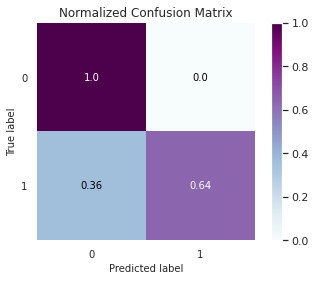

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, cmap='BuPu')
sns.despine(left=True, bottom=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Já percebemos que mesmo o nosso modelo dando uma acurácia bem alta, ele não foi eficaz em detectar as fraudes, conseguiu acertar apenas 62% delas. E um dos motivos, é que treinamos o nosso modelo com dados desbalanceados. Sendo assim, precisamos explorar métodos de balanceamento e ver se irá melhorar o desempenho do nosso modelo.

#### **MODELOS DE BALANCEAMENTOS**

A classe desbalanceada ocorre quando temos um dataset que possui muitos exemplos de uma classe e poucos exemplos da outra classe.

Essa tendência no conjunto de dados de treinamento pode influenciar muitos algoritmos de aprendizado de máquina, levando alguns a ignorar completamente a classe minoritária, sendo um problema, pois normalmente é a classe minoritária em que as previsões são mais importantes.

Para isso levantamos 4 modelos de balanceamento de classe:

- RandomUnderSampling (RUS)
- SMOTE (Over-Sampling)
- ADASYN
- Near Miss (version=1)

Para cada uma iremos além de balancear, treinar o modelo utilizando a regressão logística e verificar o desempenho observando a matriz de confusão e as outras métricas.

##### **RandomUnderSampling (RUS)**

As técnicas de subamostragem ou Random Undersampling removem os dados aleatórios do conjunto de dados de treinamento que pertencem à classe majoritária (classe 0) para equilibrar melhor a distribuição da classe.

[imagem]

Vamos importar o módulo do RUS, separar os dados de treino e chegar à distribuição após o balanceamento.



1    373
0    373
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


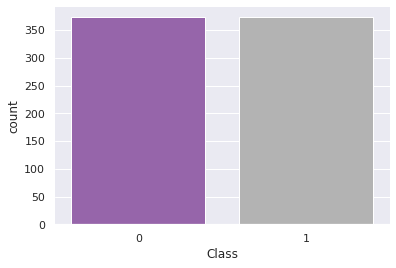

In [ ]:
#RUS (Random Under Sampling)
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Checar o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# Plotar a nova distribuição de Classes
flatui = ["#9b59b6", "#b3b3b3"]
sns.set_palette(flatui)
sns.countplot(y_rus);
sns.despine(left=True)
plt.show()

Ele balanceou, definindo as fraudes como a classe minoritária, e assim reduzindo os dados das transações normais. Agora vamos treinar o modelo e verificar o seu desempenho.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9681    0.9837     71083
           1     0.0443    0.8824    0.0844       119

    accuracy                         0.9680     71202
   macro avg     0.5221    0.9252    0.5340     71202
weighted avg     0.9982    0.9680    0.9822     71202

AUC: 0.9252



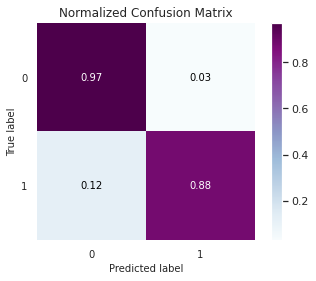

In [ ]:
#modelo de regressão logistica
model = LogisticRegression()
model.fit(X_rus, y_rus)
importance_rus = model.coef_[0]

# fazer as previsões em cima dos dados de teste
y_pred_rus = model.predict(X_test)

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rus, normalize=True, cmap='BuPu')
sns.despine(left=True, bottom=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rus, digits=4))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_rus)))

Comparando com o modelo desbalanceado, tivemos uma redução na acurácia global, mas aumentou bastante a assertividade na detecção de fraudes (90%) e reduziu o percentual de falsos negativos.

##### **SMOTE (Over-Sampling)**

Synthetic Minority Oversampling Technique ou Técnica de sobreamostragem de minoria sintética é a abordagem mais simples e envolve a duplicação de exemplos na classe minoritária, embora esses exemplos não adiciona nenhuma informação nova ao modelo, esses novos exemplos podem ser sintetizados a partir dos exemplos existentes

[imagem]

Seguindo o mesmo processo da linha de código da técnica anterior, vamos analisar o balanceamento.

1    213232
0    213232
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


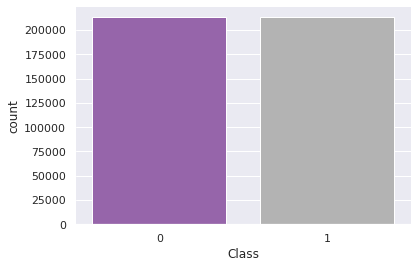

In [ ]:
# Balanceamento dos Dados com Over-Sampling (SMOTE)
from imblearn.over_sampling import SMOTE

smo = SMOTE()
X_smo, y_smo = smo.fit_resample(X_train, y_train)

# Checar o balanceamento das classes
print(pd.Series(y_smo).value_counts())

# Plotar a nova distribuição de Classes
flatui = ["#9b59b6", "#b3b3b3"]
sns.set_palette(flatui)
sns.countplot(y_smo);
sns.despine(left=True)

Como é possível notar tivemos um aumento no volume de dados que são fraudes. agora vamos avaliar a eficiência do modelo.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9761    0.9878     71083
           1     0.0577    0.8739    0.1083       119

    accuracy                         0.9760     71202
   macro avg     0.5288    0.9250    0.5481     71202
weighted avg     0.9982    0.9760    0.9863     71202

AUC: 0.9250



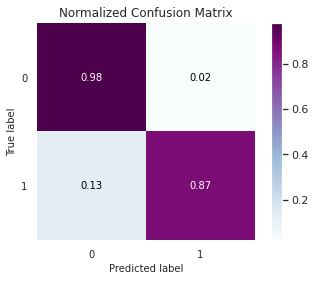

In [ ]:
#modelo de regressão logistica
model = LogisticRegression()
model.fit(X_smo, y_smo)
importance_smo = model.coef_[0]

# fazer as previsões em cima dos dados de teste
y_pred_smo = model.predict(X_test)

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_smo, normalize=True, cmap='BuPu')
sns.despine(left=True, bottom=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_smo, digits=4))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_smo)))

Comparando novamente com o modelo desbalanceado a acurácia foi menor, mas teve uma maior eficiência na detecção de fraudes (91%).

##### **ADASYN**

ADASYN (Abordagem de amostragem sintética adaptável para aprendizado desequilibrado), ele é um método muito semelhante ao Smote, mas depois de criar a amostra, ele adiciona valores aleatórios pequenos aos pontos, tornando-os mais realistas. Em outras palavras, em vez de toda a amostra ser linearmente correlacionada à origem, eles têm um pouco mais de variância, ou seja, elas são dispersas.


0    213232
1    213229
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


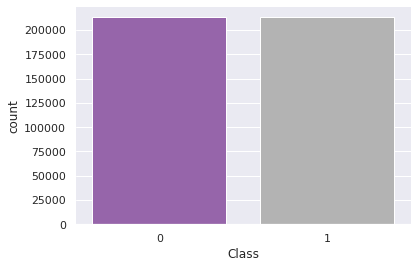

In [ ]:
from imblearn.over_sampling import ADASYN

ada = ADASYN()
X_ada, y_ada = ada.fit_resample(X_train, y_train)

# Checar o balanceamento das classes
print(pd.Series(y_ada).value_counts())

# Plotar a nova distribuição de Classes
flatui = ["#9b59b6", "#b3b3b3"]
sns.set_palette(flatui)
sns.countplot(y_ada);
sns.despine(left=True)

A quantidade de valores de cada classe é muito semelhante ao SMOTE, temos que analisar se essas pequenas diferenças irão alterar no desempenho do modelo.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9178    0.9571     71083
           1     0.0185    0.9244    0.0362       119

    accuracy                         0.9178     71202
   macro avg     0.5092    0.9211    0.4966     71202
weighted avg     0.9982    0.9178    0.9555     71202

AUC: 0.9211



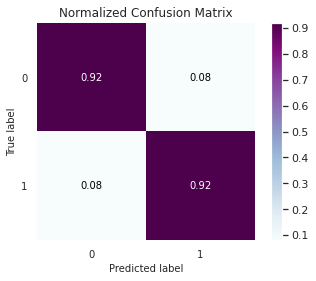

In [ ]:
#modelo de regressão logistica
model = LogisticRegression()
model.fit(X_ada, y_ada)
importance_ada = model.coef_[0]

# fazer as previsões em cima dos dados de teste
y_pred_ada = model.predict(X_test)

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_ada, normalize=True, cmap='BuPu')
sns.despine(left=True, bottom=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_ada, digits=4))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_ada)))

Quando comparamos com o modelo desbalanceado e o SMOTE, notamos que a acurácia é menor, mas é maior a eficiência em detectar fraudes. Ou seja, pequenas inserções de valores aleatórios fez o modelo ter um bom ganho de desempenho. 

##### **Near Miss**

O algoritmo é semelhante ao RUS, a diferença é que ele observa a distribuição de classes e elimina aleatoriamente amostras da classe majoritária. Quando dois pontos pertencentes a classes diferentes estão muito próximos um do outro na distribuição, esse algoritmo elimina o ponto de dados da classe majoritária, tentando equilibrar a distribuição. 

1    373
0    373
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


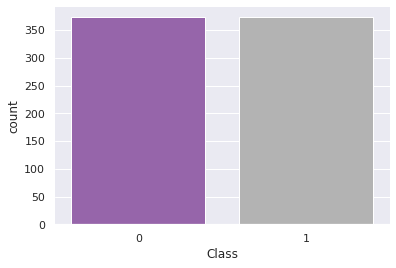

In [ ]:
from imblearn.under_sampling import NearMiss

nr = NearMiss()
X_nr, y_nr = nr.fit_resample(X_train, y_train) #pq o resaple??

# Checar o balanceamento das classes
print(pd.Series(y_nr).value_counts())

# Plotar a nova distribuição de Classes
flatui = ["#9b59b6", "#b3b3b3"]
sns.set_palette(flatui)
sns.countplot(y_nr);
sns.despine(left=True)

A quantidade de amostra é igual ao modelo do RUS, vamos analisar o desempenho do modelo.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9997    0.5563    0.7148     71083
           1     0.0034    0.9160    0.0069       119

    accuracy                         0.5569     71202
   macro avg     0.5016    0.7361    0.3608     71202
weighted avg     0.9981    0.5569    0.7136     71202

AUC: 0.7361



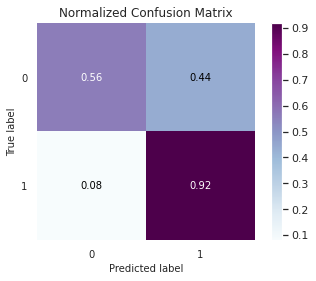

In [ ]:
#modelo de regressão logistica
model = LogisticRegression()
model.fit(X_nr, y_nr)
importance_nr = model.coef_[0]

# fazer as previsões em cima dos dados de teste
y_pred_nr = model.predict(X_test)

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_nr, normalize=True, cmap='BuPu')
sns.despine(left=True, bottom=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_nr, digits=4))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_nr)))

De todos os modelos esse é o que tem a menor acurácia, apesar de ter uma grande eficiência em detectar fraudes (93%), ele falhou um pouco em detectar falsos positivos.

#### **COMPARANDO OS DESEMPENHO DOS MODELOS**

É admissível dizer que o balanceamento dos dados é um fator extremamente relevante no contexto de ter uma machine learning eficiente, mesmo sua acurácia sendo menor, os modelos balanceados demonstram uma maior eficiência na detecção de fraudes.

O modelo NearMiss, apesar de possuir uma eficiência boa em detectar fraudes, pecou com os falsos positivos (32%). 

O RUS teve seu desempenho muito melhor que seu companheiro de modelo NearMiss, tendo uma eficiência de 90% na detecção de fraudes, mas mesmo assim falhou com os falsos negativos (10%).

O ADASYN e o SMOTE foram os dois melhores modelos, com desempenho muito bons, dando ênfase ao SMOTE, que teve uma acurácia de 97,5%, com uma eficiência de 91% na hora de detectar fraudes.

No geral ele seria o modelo escolhido para desenvolver nosso sistema de detecção de fraudes, mas antes de terminar nossa análise, um fator importante é entender quais as variáveis que mais influenciam no desempenho dos nossos modelos.

Para isso vamos plotar uma matriz de correlação para cada um dos nossos modelos.


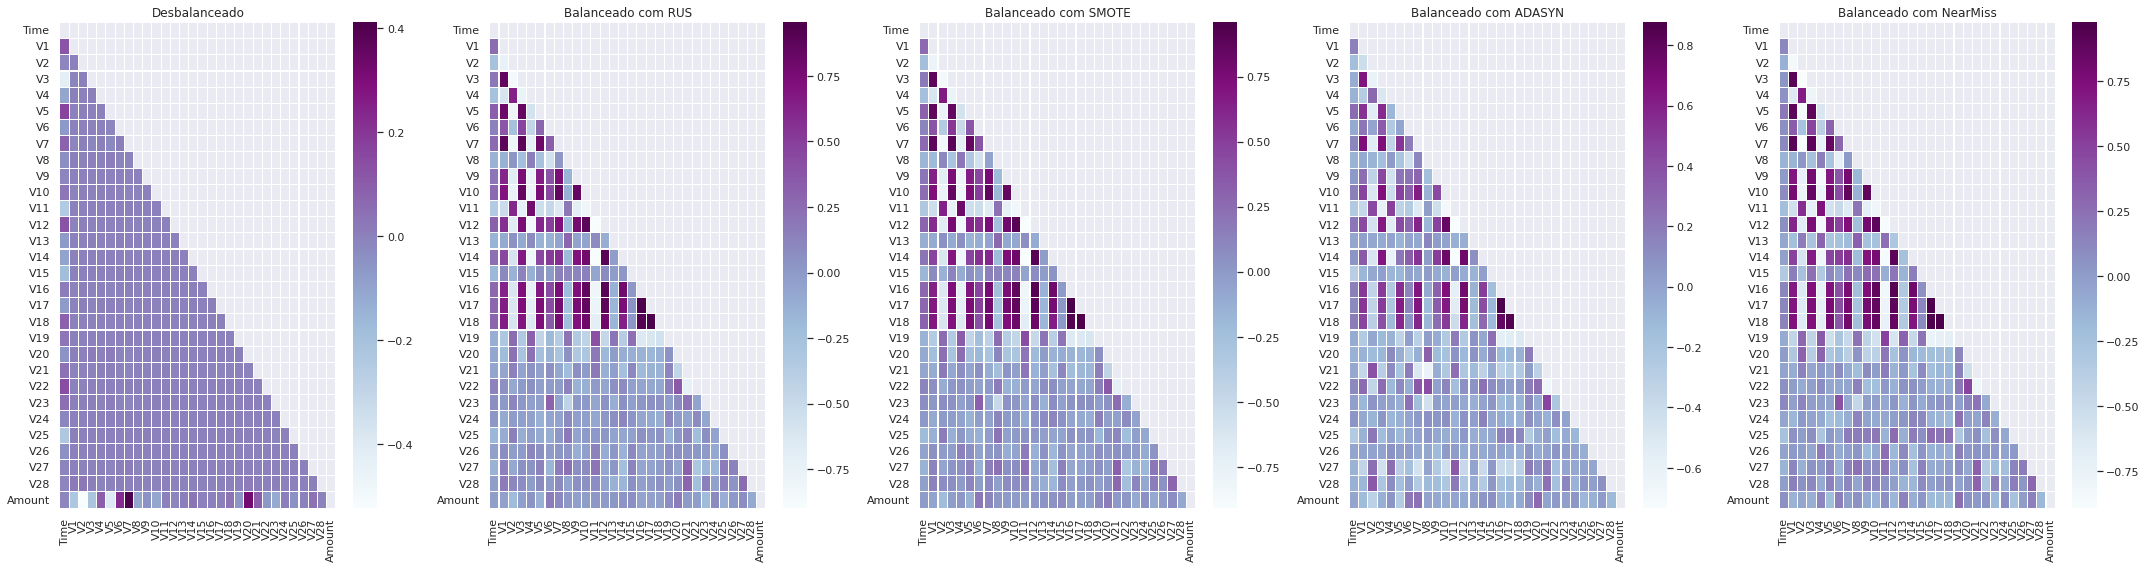

In [ ]:
# plotar a matriz de correlação
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()
corr_smo = pd.DataFrame(X_smo).corr()
corr_ada = pd.DataFrame(X_ada).corr()
corr_nr = pd.DataFrame(X_nr).corr()

fig, ax = plt.subplots(nrows=1, ncols=5, figsize = (30,8))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="BuPu", ax=ax[0], mask=np.triu(corr))
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="BuPu", ax=ax[1],  mask=np.triu(corr_rus))
ax[1].set_title('Balanceado com RUS')

sns.heatmap(corr_smo, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="BuPu", ax=ax[2], mask=np.triu(corr_smo))
ax[2].set_title('Balanceado com SMOTE')

sns.heatmap(corr_ada, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="BuPu", ax=ax[3], mask=np.triu(corr_ada))
ax[3].set_title('Balanceado com ADASYN')

sns.heatmap(corr_nr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="BuPu", ax=ax[4], mask=np.triu(corr_nr))
ax[4].set_title('Balanceado com NearMiss')

plt.tight_layout()

Conseguimos agora ver quais as variáveis se correlacionam proporcionalmente e inversamente. Mas para ter um entendimento melhor, precisamos saaber qual variável é a mais importante para o modelo. 

Os modelos de regressão logística são instanciados e se ajustam da mesma forma utilizando o atributo **coef_** que contém os coeficientes encontrados para cada variável de entrada. Esses coeficientes podem fornecer a base para uma pontuação bruta de importância do recurso.

Para isso vamos buscar no nosso modelo o **coef[1]** do nosso melhor modelo (SMOTE), já coletado e assim gerar um plot com as variáveis mais importantes. 


Text(0.5, 1.0, 'Importância de cada feature')

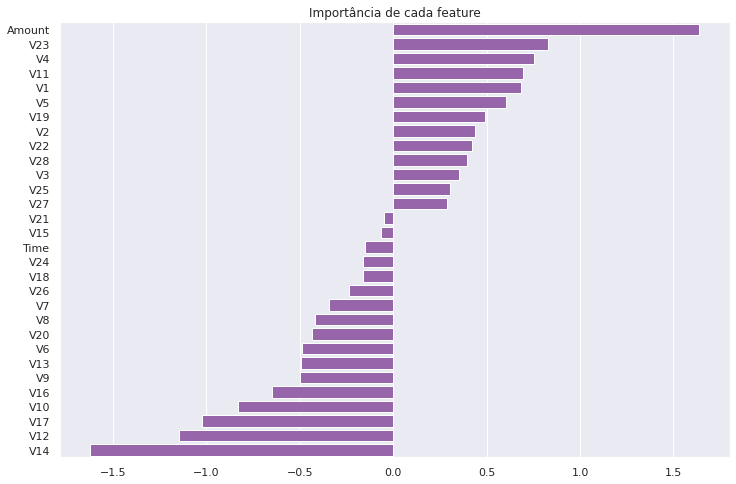

In [ ]:
importances = pd.Series(data=importance_smo, index=X.columns.values)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(12,8))
ax = sns.barplot(x=importances, y=importances.index, orient='h', color='#9b59b6')
ax.set_title('Importância de cada feature')

Este é um problema de classificação com classes 0 e 1. Observe que os coeficientes são positivos e negativos. As pontuações positivas indicam uma característica que prevê a classe 1, enquanto as pontuações negativas indicam uma característica que prevê a classe 0.

E analisando nosso gráfico, notamos que a variável `Amount` e `V4`, são as que mais impactam na detecção de fraudes, já o `V10` é a mais importante para predizer as transações normais.

#### **RESUMO FINAL DA ÓPERA**

Desenvolver um modelo de machine learning realmente não é fácil, ele possui algumas complexidades na qual é necessário explorar para identificar pontos que prejudicaram o desenvolvimento do modelo, como o caso do balanceamento dos dados e a transformação PCA.

O que esse trabalho impacta para quem atua com marketing? 

Muita coisa meu caro. Comercial e marketing andam lado a lado, e negócios como e-commerces recebem compras diariamente, imagine essa machine learning, ela poderia tornar-se um produto para eles, na qual facilitaria a identificação de compras com cartões de créditos fraudados e evitaria complicações para seus clientes, se tornando um diferencial da sua marca.

Sei que foi uma caminhada longa nesse artigo, mas esse é o trabalho de quem vê o mundo através dos dados e assim gera inteligência com uma base forte. Então, meu caro marketeiro.

Prontos para começar do zero?

    Produção Zero.AI
    Texto e pesquisa Hyan Dias
    Revisão 
    Ilustração e animação Hyan Dias
    Fonte de inspiração: Sigmoidal
